In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import math
import scipy as sp
import copy
import os
import matplotlib.pyplot as plt
from libwallerlab.projects.motiondeblur import blurkernel
from libwallerlab.projects.motiondeblur import bluranalysis  as analysis
# import bluranalysis  as analysis

# plt.style.use('deblur')

## Pulse Length and DNF

<IPython.core.display.Javascript object>


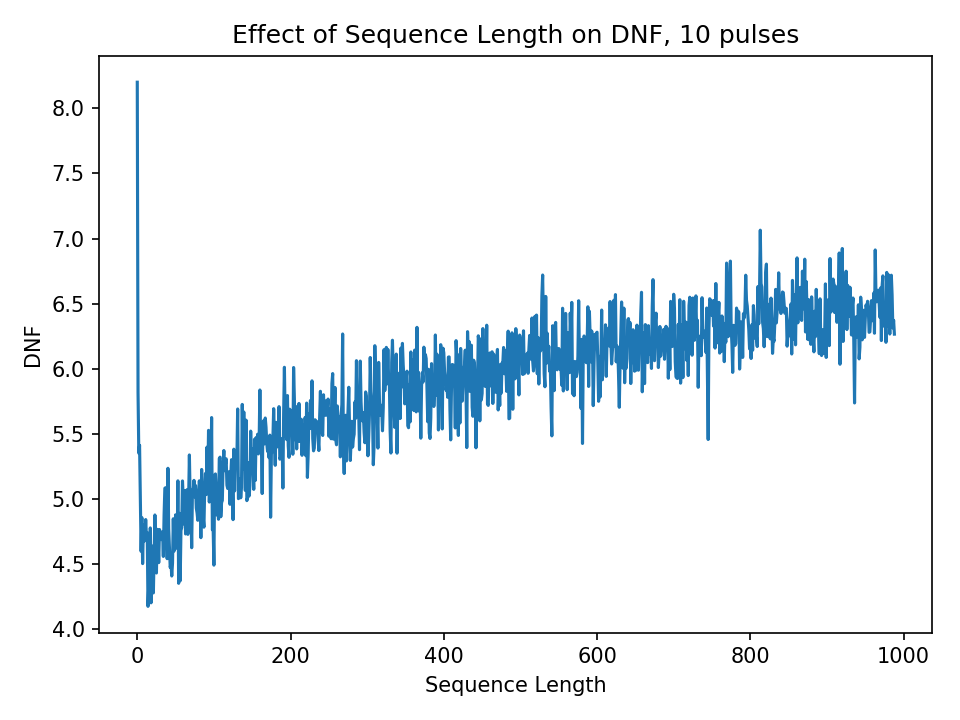

In [11]:
kernel_len_list = np.arange(11,1000)
n_pulses = 10
dnf_list = []
for kernel_len in kernel_len_list:
    dnf_list.append(analysis.getOptimalDnf(kernel_len, n_pulses=n_pulses, n_tests=100, padding_size=kernel_len//2))

plt.figure()
plt.plot(dnf_list)
plt.xlabel('Sequence Length')
plt.ylabel('DNF')
plt.title('Effect of Sequence Length on DNF, %d pulses' % n_pulses)
plt.tight_layout()

<IPython.core.display.Javascript object>


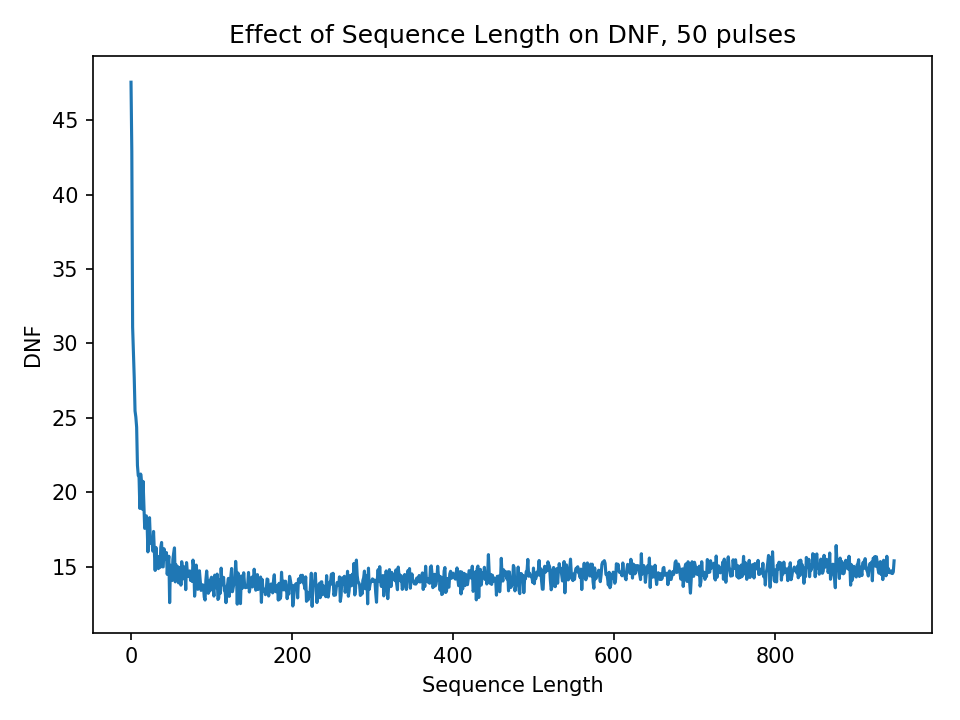

In [13]:
kernel_len_list = np.arange(51,1000)
n_pulses = 50
dnf_list = []
for kernel_len in kernel_len_list:
    dnf_list.append(analysis.getOptimalDnf(kernel_len, n_pulses=n_pulses, n_tests=100, padding_size=kernel_len//2))

plt.figure()
plt.plot(dnf_list)
plt.xlabel('Sequence Length')
plt.ylabel('DNF')
plt.title('Effect of Sequence Length on DNF, %d pulses' % n_pulses)
plt.tight_layout()

## DNF vs Pulse Count

In [3]:
kernel_size = 1000 
pulse_count_list = np.arange(10,500)

kernel_sizes = np.arange(50,1000)

#pulse_count_list = np.arange(3,1500)

dnf_list = []; dnf_mean_list = []; dnf_median_list = [];
dnf_upper_list = []; dnf_lower_list = []
for pulse_count in pulse_count_list:
    res = analysis.getOptimalDnf(2*pulse_count, n_pulses=pulse_count, n_tests=100, 
                                           padding_size=None, metric='dnf')
    dnf_list.append(res); 
#     dnf_mean_list.append(res[2]); dnf_median_list.append(res[3])
#     dnf_upper_list.append(res[4]); dnf_lower_list.append(res[5])

    
# dnf_list = []
# pulse_count = 25
# for kernel_size in kernel_sizes:
#     dnf_list.append(analysis.getOptimalDnf(kernel_size, n_pulses=pulse_count, n_tests=100))



In [21]:
def check_equiv(n_pulses, kernel_length, padding_size=0):
    kernel = np.zeros(kernel_length+padding_size)
    # indicies = np.random.choice(kernel_length, size=n_pulses, replace=False)
    # kernel[indicies] = 1.0
    kernel[0:kernel_length] = np.random.uniform(0,1, size=kernel_length)
    
    x_fft = np.fft.fft(kernel)
    sigma_x = np.abs(x_fft)**2
    return np.sum(kernel**2)-np.mean(sigma_x)

In [22]:
for n_pulses in range(10,100):
    kernel_length = 200; padding_size = kernel_length
    print(check_equiv(n_pulses, kernel_length, padding_size))

0.0
1.4210854715202004e-14
-7.105427357601002e-15
1.4210854715202004e-14
2.842170943040401e-14
0.0
-1.4210854715202004e-14
1.4210854715202004e-14
7.105427357601002e-15
0.0
7.105427357601002e-15
0.0
-1.4210854715202004e-14
-1.4210854715202004e-14
0.0
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
-1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
0.0
0.0
0.0
1.4210854715202004e-14
0.0
1.4210854715202004e-14
7.105427357601002e-15
0.0
0.0
1.4210854715202004e-14
0.0
0.0
0.0
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
0.0
-1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
1.4210854715202004e-14
-1.4210854715202004e-14
-1.4210854715202004e-14
1.4210854715202004e-14
0.0
-1.4210854715202004e-14
0.0
2.842170943040401e-14
1.4210854715202004e-14
7.105427357601002e-15
-7.105427357601002e-15
1.4210854715202004e-14
0.0
-1.421

In [17]:
dnf_list**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

[0.63684587 1.22013703]


<IPython.core.display.Javascript object>


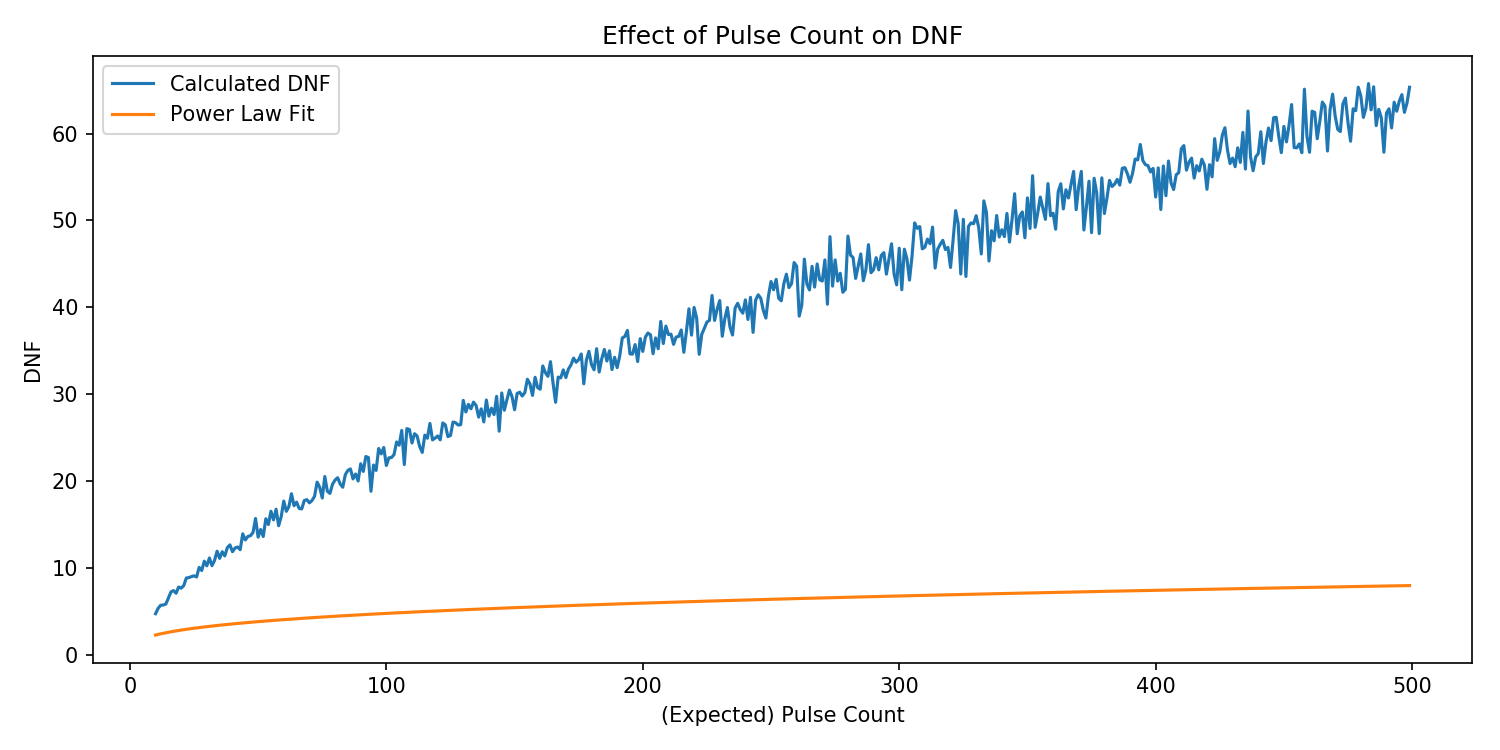

In [4]:
# Perform log fit
coeffs = np.polyfit(np.log10(pulse_count_list), dnf_list, 1)
y = coeffs[0] * np.log10(pulse_count_list) + coeffs[1]

def func_powerlaw(x, m):
    return np.sqrt(2) * x**m - 1

def func_powerlaw(x, m0, m1, m2):
    return m1 * x**m0 + m2

def func_powerlaw(x, m0, m1):
    return m1 * x**m0 



sol1, _ = sp.optimize.curve_fit(func_powerlaw, pulse_count_list, np.array(dnf_list), maxfev=3000 )
print(sol1)
# sol1 = [0.6116, np.sqrt(2), -1]
yp = func_powerlaw(pulse_count_list, *sol1)

plt.figure(figsize=(10,5))
plt.plot(pulse_count_list, dnf_list, label='Calculated DNF')
plt.plot(pulse_count_list, np.sqrt(yp), label='Power Law Fit')
plt.xlabel('(Expected) Pulse Count')
plt.ylabel('DNF')
plt.title('Effect of Pulse Count on DNF')
plt.legend()
plt.tight_layout()

In [20]:
1.27858183 / 2

0.639290915

In [21]:
np.sqrt(1.45256379)

1.2052235435801941

## Try with $3\times$ pulse count

<IPython.core.display.Javascript object>


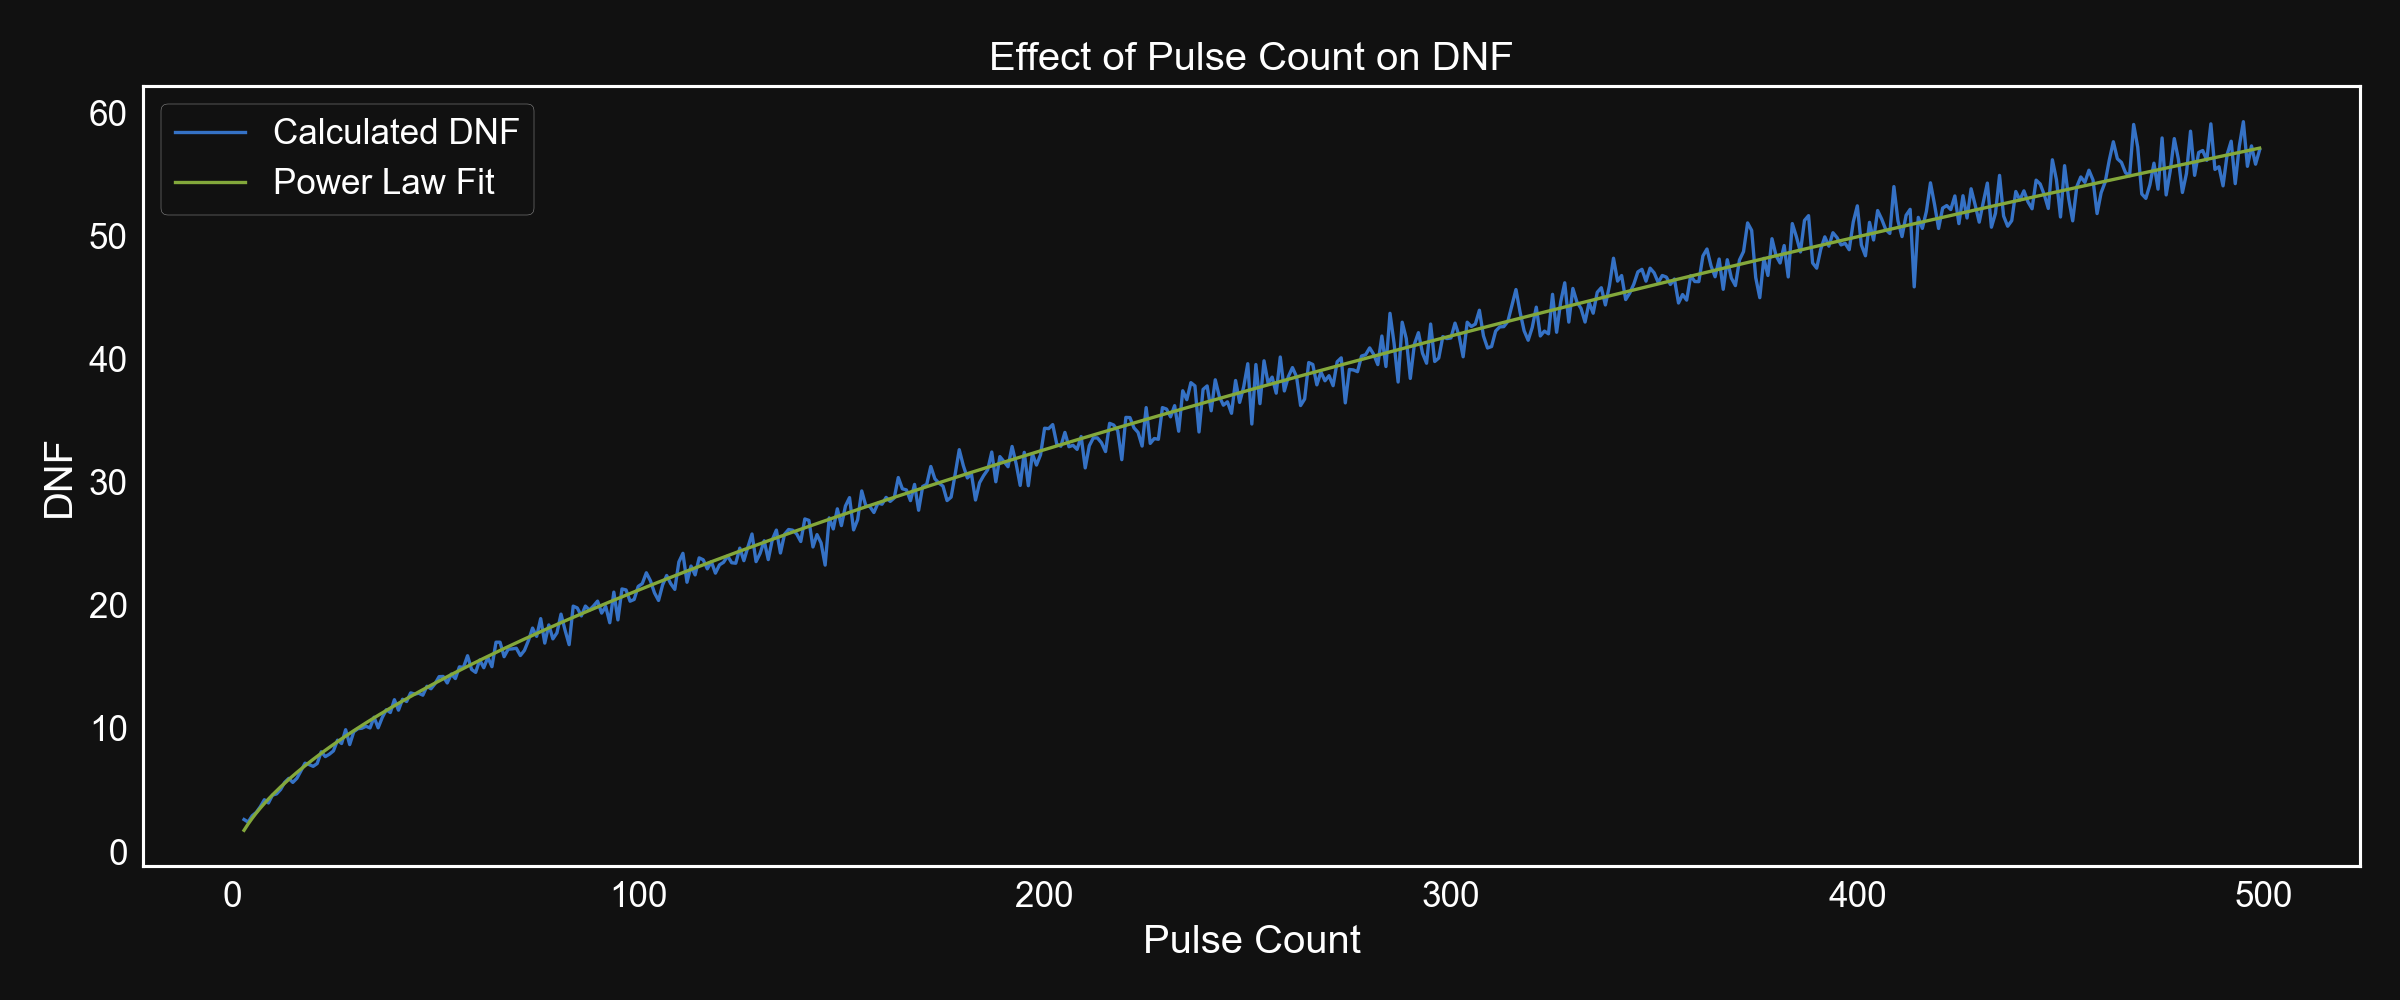

In [44]:
pulse_count_list = np.arange(3,500)
n_pulses = 50
dnf_list = []
for pulse_count in pulse_count_list:
    dnf_list.append(analysis.getOptimalDnf(pulse_count * 3, n_pulses=pulse_count, n_tests=100))

# Perform log fit
coeffs = np.polyfit(np.log10(pulse_count_list), dnf_list, 1)
y = coeffs[0] * np.log10(pulse_count_list) + coeffs[1]

def func_powerlaw(x, m):
    return np.sqrt(2) * x**m - 1

sol1, _ = sp.optimize.curve_fit(func_powerlaw, pulse_count_list, dnf_list, maxfev=2000 )
# sol1 = [0.6116, np.sqrt(2), -1]
print(sol1)
yp = func_powerlaw(pulse_count_list, sol1[0])

plt.figure(figsize=(12,5))
plt.plot(pulse_count_list, dnf_list, label='Calculated DNF')
plt.plot(pulse_count_list, yp, label='Power Law Fit')
plt.xlabel('Pulse Count')
plt.ylabel('DNF')
plt.title('Effect of Pulse Count on DNF')
plt.legend()
plt.tight_layout()

## What does the SNR vs n_pulses curve look like?

<IPython.core.display.Javascript object>


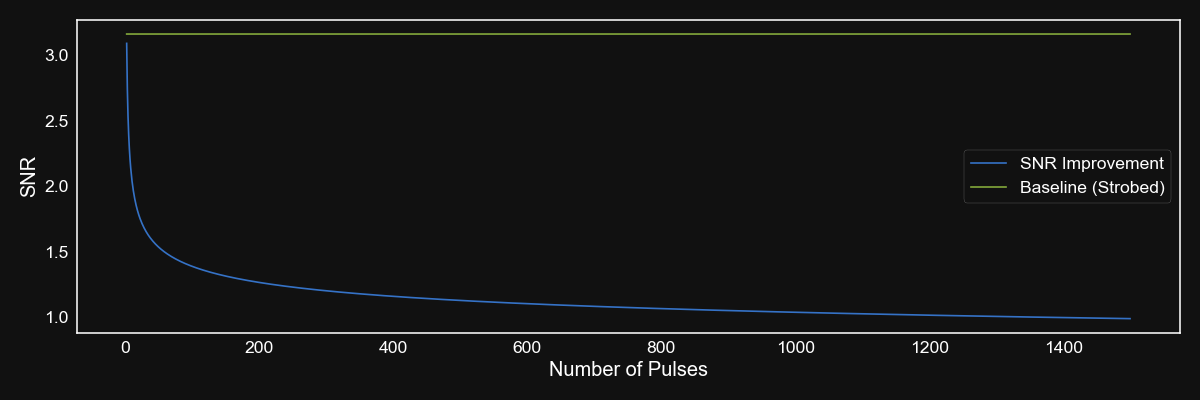

In [106]:
N = pulse_count_list
c = 10
snr_strobed = np.sqrt(c)
f = func_powerlaw(pulse_count_list, sol1[0])
snr_imaging = np.sqrt(N * c)
snr_dnf = snr_imaging / f

plt.figure()
plt.plot(pulse_count_list, snr_dnf, label='SNR Improvement')
plt.plot(pulse_count_list, snr_strobed * np.ones_like(snr_dnf), label='Baseline (Strobed)')
# plt.plot(pulse_count_list, snr_0, label='Imaging SNR')
plt.legend()
plt.xlabel('Number of Pulses')
plt.ylabel('SNR')
plt.tight_layout()

In [107]:
# signal_photons = 100
# noise_var = 1000
# G = np.sqrt(1 + noise_var / signal_photons)
# print(G)

3.3166247903554


# What if you add signal-independent noise?

<IPython.core.display.Javascript object>


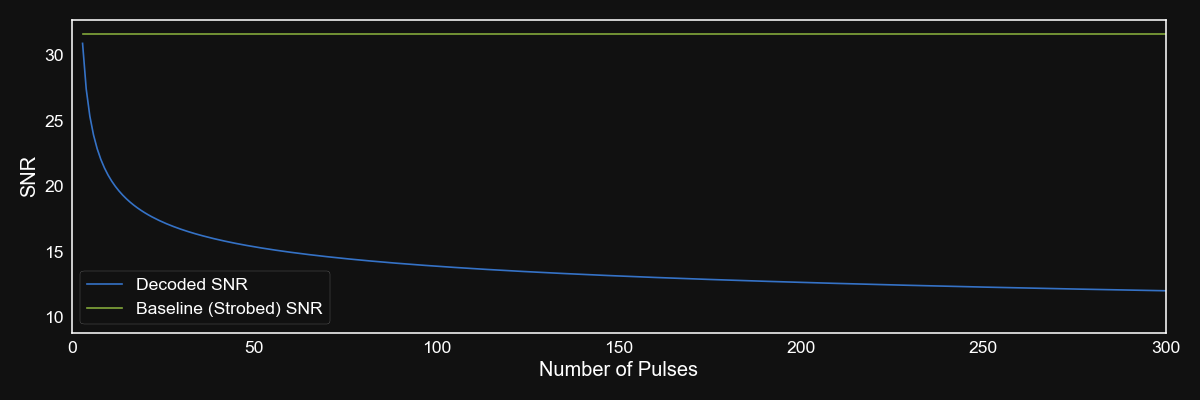

In [138]:
N = pulse_count_list
c = 1000
var_dependent = N * c
var_independent = 0

# Calculate DNF
f = func_powerlaw(pulse_count_list, sol1[0])

# Calculate SNR for astrobed and coded illum
snr_strobed = c / np.sqrt(c + var_independent)
snr_coded = c * N / (f * np.sqrt(N * c + var_independent))

plt.figure()
plt.plot(pulse_count_list, snr_coded, label='Decoded SNR')
plt.plot(pulse_count_list, snr_strobed * np.ones_like(snr_coded), label='Baseline (Strobed) SNR')
# plt.plot(pulse_count_list, snr_0, label='Imaging SNR')
plt.legend()
plt.xlabel('Number of Pulses')
plt.ylabel('SNR')
plt.xlim((0,300))
plt.tight_layout()

<IPython.core.display.Javascript object>


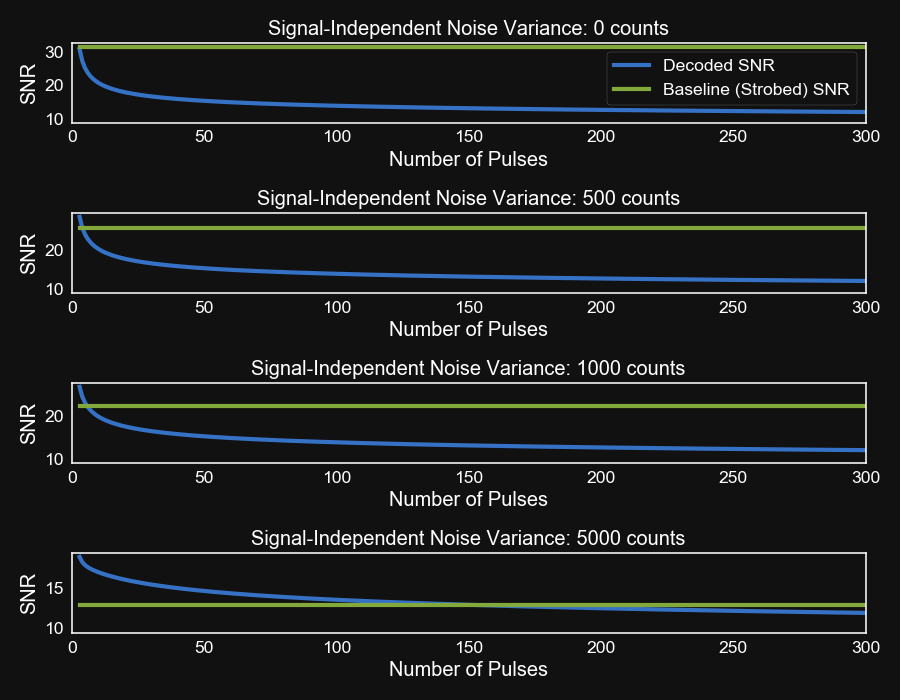

In [150]:
N = pulse_count_list
c = 1000
var_dependent = N * c
var_independent = 500

# Calculate DNF
f = func_powerlaw(pulse_count_list, sol1[0])

plt.figure(figsize=(9,7))

for index, var_independent in enumerate([0, 500, 1000, 5000]):
    
    plt.subplot(411 + index)

    # Calculate SNR for astrobed and coded illum
    snr_strobed = c / np.sqrt(c + var_independent)
    snr_coded = c * N / (f * np.sqrt(N * c + var_independent))


    plt.plot(pulse_count_list, snr_coded, label='Decoded SNR', lw=3)
    plt.plot(pulse_count_list, snr_strobed * np.ones_like(snr_coded), label='Baseline (Strobed) SNR', lw=3)
    # plt.plot(pulse_count_list, snr_0, label='Imaging SNR')
    if index ==0:
        plt.legend()
        
    plt.xlabel('Number of Pulses')
    plt.ylabel('SNR')
    plt.xlim((0,300))
    plt.title('Signal-Independent Noise Variance: %d counts' % var_independent)
    plt.tight_layout()